In [162]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

In [163]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [164]:
#Importo el DataFrame que he limpiado en mi jn de "cleaning"
Visual= pd.read_csv("../DATA_limpia/attackv3.csv",encoding="ISO-8859–1")
Visual

,case_number,date,year,country,activity,sex_,age,fatal_yn,species_,Year_2,Type_attack,country_2,Gender2,Ages_2,Months,Fatality
0,2018.06.25,25-Jun-2018,2018.0,ADMIRALTY ISLANDS,Paddling,F,57,N,White shark,2018,Boat,ADMIRALTY ISLANDS,F,57,Jun,N
1,2018.06.18,18-Jun-2018,2018.0,AFRICA,Standing,F,11,N,NaN,2018,Unprovoked,AFRICA,F,11,Jun,N
2,2018.06.09,09-Jun-2018,2018.0,ALGERIA,Surfing,M,48,N,NaN,2018,No_Info,ALGERIA,M,48,Jun,N
3,2018.06.08,08-Jun-2018,2018.0,AMERICAN SAMOA,Surfing,M,NaN,N,2 m shark,2018,Unprovoked,AMERICAN SAMOA,M,No_Info,Jun,N
4,2018.06.04,04-Jun-2018,2018.0,AMERICAN SAMOA,Free diving,M,NaN,N,"Tiger shark, 3m",2018,Provoked,AMERICAN SAMOA,M,No_Info,Jun,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0,NaN,NaN,NAN,NaN,NaN,NaN,NaN,NaN,-,NaN,NAN,NaN,No_Info,No_Info,NaN
8699,0,NaN,NaN,NAN,NaN,NaN,NaN,NaN,NaN,-,NaN,NAN,NaN,No_Info,No_Info,NaN
8700,0,NaN,NaN,NAN,NaN,NaN,NaN,NaN,NaN,-,NaN,NAN,NaN,No_Info,No_Info,NaN
8701,0,NaN,NaN,NAN,NaN,NaN,NaN,NaN,NaN,-,NaN,NAN,NaN,No_Info,No_Info,NaN


In [165]:
#Elimino columnas que no voy a utilizar en mis gráficos para probar mis hipótesis
Visual.drop(["date","year","case_number","country","activity","species_","sex_"],axis=1,inplace=True)

In [166]:
V11=Visual.copy()

PRIMERA HIPÓTESIS. Los registros se concentran periodos y en meses determinados.

In [167]:
#1.Convierto años en int ya que es una lista de str.
#2.Sustituyo "cambio" como nuevo valor de mi fila (Serie) de string a numérico.
cambio=pd.to_numeric(serie)
Visual["Year_2"]=cambio

In [168]:
serie=list(Visual["Year_2"].replace("-",np.nan))

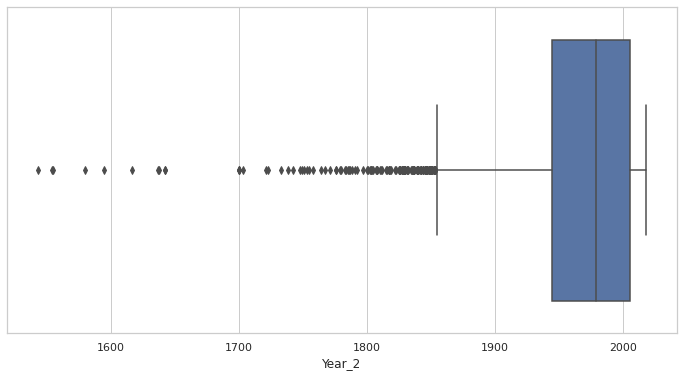

In [169]:
#Vemos que los ataques se concentran a partir del año 1950 aprox.
from matplotlib import rcParams
sns.boxplot(x="Year_2", data=Visual)
rcParams['figure.figsize'] = 12,6;

In [170]:
#Limpiamos la matriz para ver si los meses influyen en la cantidad de ataques

In [171]:
#Convertimos los meses en números y aplicamos la función con un maps
def Meses2(x):
    if x=="Jan":
        return 1
    elif x=='Feb':
        return 2
    elif x=='Mar':
        return 3
    elif x=='Apr':
        return 4
    elif x=='May':
        return 5
    elif x=='Jun':
        return 6
    elif x=='Jul':
        return 7
    elif x=='Aug':
        return 8
    elif x=='Sep':
        return 9
    elif x=='Oct':
        return 10
    elif x=='Nov':
        return 11
    elif x=='Dec':
        return 12
    else:
        return "No_Info"

In [172]:
MESES=list(Visual["Months"])

In [173]:
#Comprobamos que se ha hecho bien el map
Meses_2=map(Meses2,MESES)
Meses_3=list(Meses_2)
#Aplicamos en Months la nueva columna con los meses como números
Visual["Months"]=Meses_3

In [174]:
#Hago filtro para obtener el df que quiero para la primera visualización. Años >=1950 y meses en los que hay información.
filtro=Visual[(Visual["Months"]!='No_Info') & (Visual["Year_2"]>=1950)]
filtro

,age,fatal_yn,Year_2,Type_attack,country_2,Gender2,Ages_2,Months,Fatality
0,57,N,2018.0,Boat,ADMIRALTY ISLANDS,F,57,6,N
1,11,N,2018.0,Unprovoked,AFRICA,F,11,6,N
2,48,N,2018.0,No_Info,ALGERIA,M,48,6,N
3,NaN,N,2018.0,Unprovoked,AMERICAN SAMOA,M,No_Info,6,N
4,NaN,N,2018.0,Provoked,AMERICAN SAMOA,M,No_Info,6,N
...,...,...,...,...,...,...,...,...,...
4480,NaN,NaN,1950.0,No_Info,USA,M,No_Info,3,NaN
4481,NaN,N,1950.0,Unprovoked,USA,M,No_Info,2,N
4482,14,Y,1950.0,Unprovoked,USA,M,14,2,Y
4483,NaN,NaN,1950.0,No_Info,USA,M,No_Info,1,NaN


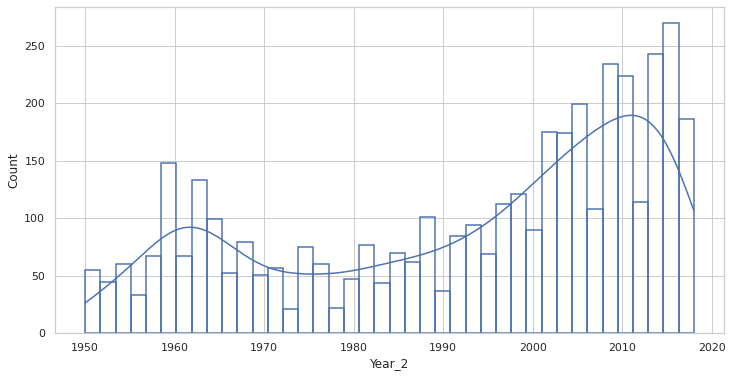

In [175]:
#Analizamos los años en la franja de 1950-2020 y vemos que en estos últimos años los casos han aumentado respecto a los 50'.
sns.histplot(x=filtro.Year_2, bins=40, fill=None, kde=True);

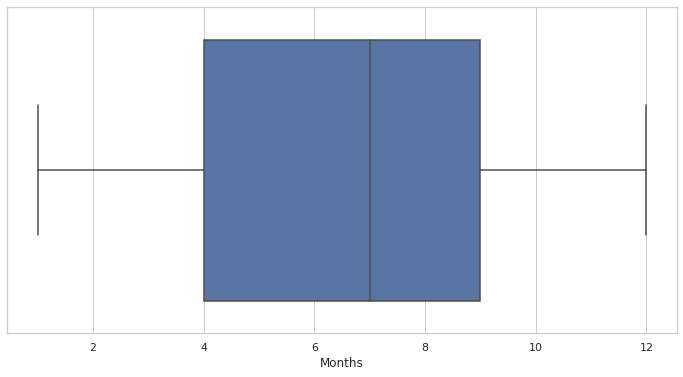

In [176]:
#En los años analizados, vemos que los ataques se concentran en los meses de verano (boreal) e invierno (austral).
sns.boxplot(x="Months", data=filtro);

In [177]:
#De mayor a menor, los meses en función del número de ataques (desde 1950)
surfistass=filtro.groupby(['Months']).agg({'Year_2':'count'}).reset_index().rename(columns={"Year_2":"Ataques"})
surfistass.sort_values(by="Ataques",ascending=False)

,Months,Ataques
6,7,463
7,8,424
8,9,412
5,6,370
0,1,346
3,4,334
9,10,331
11,12,302
2,3,276
4,5,271


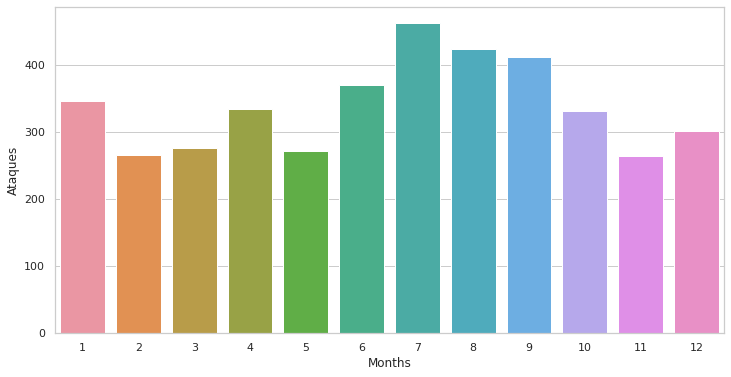

In [178]:
sns.barplot(x="Months", y="Ataques", data=surfistass, ci="sd")
rcParams['figure.figsize'] = 12,6; 

SEGUNDA HIPÓTESIS. La edad y el sexo influyen en la posibilidad de que el ataque sea fatal

In [179]:
#AGRUPAMOS VALORES EN FATALITY
#Creo una función para reemplazar los valores de Y/N por 0/1,respectivamente, y por "-" si no hay información. 
#Luego aplico la función a la la columna con un map.
def Fat(x):
    if x=='Y':
        return 1
    elif x=='N':
        return 0
    else:
        return '-'

In [180]:
lista_fatal=list(Visual["Fatality"])
Fatality=map(Fat,lista_fatal)
Fatal=list(Fatality)
Visual["Fatality"]=Fatal

In [181]:
Visual["Fatality"].unique() #compruebo que ahora únicamente hay valores (0,1,"-")

array([0, 1, '-'], dtype=object)

In [182]:
#AGRUPAMOS LAS EDADES EN RANGOS
def Rango(x):
    if x in Rango1:
        return 10
    elif x in Rango2:
        return 20
    elif x in Rango3:
        return 30
    elif x in Rango4:
        return 40
    elif x in Rango5:
        return 50
    elif x in Rango6:
        return 60
    elif x in Rango7:
        return 70
    elif x in Rango8:
        return 80
    elif x in Rango9:
        return 90
    else:
        return "-"

In [183]:
EDADES=list(Visual["Ages_2"])

In [184]:
Rango1=[str(i) for i in range(0,11)]
Rango2=[str(i) for i in range(0,21)]
Rango3=[str(i) for i in range(0,31)]
Rango4=[str(i) for i in range(0,41)]
Rango5=[str(i) for i in range(0,51)]
Rango6=[str(i) for i in range(0,61)]
Rango7=[str(i) for i in range(0,71)]
Rango8=[str(i) for i in range(0,81)]
Rango9=[str(i) for i in range(0,91)]

In [185]:
New_Age=map(Rango,EDADES)
Ages3=list(New_Age)
Visual["Ages_"]=Ages3

In [186]:
filtro2=Visual[(Visual["Year_2"]>=1950)&(Visual["Fatality"]==1) & (Visual["Ages_"]!="-") & (Visual["Gender2"]!="No_Info")]
filtro2

,age,fatal_yn,Year_2,Type_attack,country_2,Gender2,Ages_2,Months,Fatality,Ages_
6,18,Y,2018.0,Unprovoked,ANDAMAN ISLANDS,M,18,6,1,20
58,49,Y,2017.0,Unprovoked,AUSTRALIA,F,49,11,1,50
64,22,Y,2017.0,Unprovoked,AUSTRALIA,M,22,11,1,30
144,33,Y,2017.0,Unprovoked,AUSTRALIA,M,33,5,1,40
149,28,Y,2017.0,Unprovoked,AUSTRALIA,M,28,4,1,30
...,...,...,...,...,...,...,...,...,...,...
4466,19,Y,1950.0,Unprovoked,USA,M,19,7,1,20
4473,25,Y,1950.0,Sea Disaster,USA,M,25,6,1,30
4476,50,Y,1950.0,Sea Disaster,USA,M,50,4,1,50
4479,20,Y,1950.0,Unprovoked,USA,M,20,3,1,20


In [187]:
filtro2["Ages_"].unique() #compryuebo filtro ok

array([20, 50, 30, 40, 60, 70, 80, 10, 90], dtype=object)

In [188]:
filtro2["Gender2"].unique() #compryuebo filtro ok

array(['M', 'F', nan], dtype=object)

In [189]:
#Analizamos las muertes en el periodo determinado. Se concentran en la franja de 20-30 años y mayoritariamente son hombres

In [190]:
muertes=filtro2[["Gender2"]].value_counts()
muertes

Gender2
M          338
F           57
dtype: int64

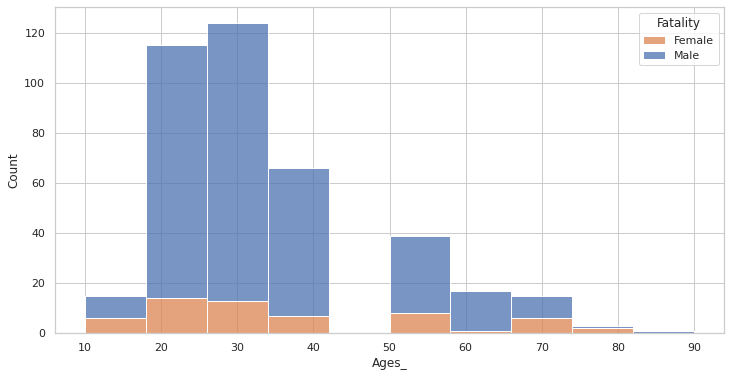

In [191]:
sns.histplot(data=filtro2, x= "Ages_", hue="Gender2", multiple="stack",bins=10)
plt.legend(title='Fatality', labels=['Female', 'Male'])
rcParams['figure.figsize'] = 12,6; 

TERCERA HIPÓTESIS. Los ataques de tiburón se concentran en determinados países y son más letales en unos que en otros

In [192]:
#Vemos el % que representan los principales países
datos_iniciales = Visual.country_2.value_counts()
datos_iniciales

NAN                 2451
USA                 2229
AUSTRALIA           1338
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
                    ... 
JAVA                   1
ITALY / CROATIA        1
IRELAND                1
IRAN / IRAQ            1
MALDIVES               1
Name: country_2, Length: 180, dtype: int64

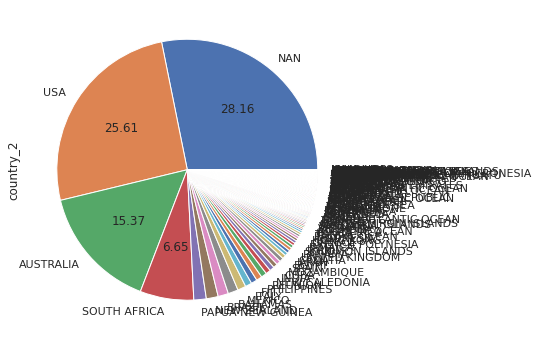

In [193]:
datos_iniciales.plot.pie(autopct=lambda p: format(p, '.2f') if p > 5 else None)
rcParams['figure.figsize'] = 6,6;

In [194]:
paises2= list(Visual["country_2"].value_counts().head(5).keys()) #ME QUEDO CON EL TOP 5 DE PAISES
paises2

['NAN', 'USA', 'AUSTRALIA', 'SOUTH AFRICA', 'PAPUA NEW GUINEA']

In [195]:
paises2.remove("NAN")

In [196]:
#Al ver el numero de registro por país, vemos que (sin tener en cuenta los NAN),son 4 los que concentran prácticamente todos.
paises = Visual[["country_2"]].value_counts()
paises_df=pd.DataFrame(paises)
paises_df.head(5)

,0
country_2,
NAN,2451
USA,2229
AUSTRALIA,1338
SOUTH AFRICA,579
PAPUA NEW GUINEA,134


In [197]:
paises_top = Visual[Visual['country_2'].isin(paises2)]
paises_top

,age,fatal_yn,Year_2,Type_attack,country_2,Gender2,Ages_2,Months,Fatality,Ages_
31,56,N,2018.0,No_Info,AUSTRALIA,M,56,4,0,60
32,NaN,N,2018.0,Unprovoked,AUSTRALIA,NaN,No_Info,4,0,-
33,12,N,2018.0,Unprovoked,AUSTRALIA,M,12,4,0,20
34,19,N,2018.0,Unprovoked,AUSTRALIA,M,19,4,0,20
35,25,N,2018.0,Unprovoked,AUSTRALIA,M,25,3,0,30
...,...,...,...,...,...,...,...,...,...,...
6195,NaN,N,NaN,Provoked,USA,M,No_Info,No_Info,0,-
6196,NaN,N,NaN,Unprovoked,USA,M,No_Info,No_Info,0,-
6197,NaN,N,NaN,Unprovoked,USA,NaN,No_Info,No_Info,0,-
6198,NaN,N,NaN,Unprovoked,USA,F,No_Info,No_Info,0,-


In [198]:
paises_top["country_2"].unique() #COMPRUEBO QUE NO HAY NAN

array(['AUSTRALIA', 'PAPUA NEW GUINEA', 'SOUTH AFRICA', 'USA'],
      dtype=object)

In [199]:
datos = paises_top.country_2.value_counts() #Si nos centramos en el TOP4, la mitad de ataques son en USA 

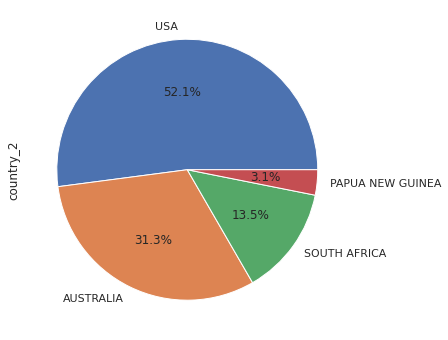

In [200]:
datos.plot.pie(autopct="%.1f%%")
rcParams['figure.figsize'] = 10,12;

In [201]:
paises_años3 = Visual[(Visual['country_2'].isin(paises2))&(Visual["Fatality"]!="-")] # Me cojo los paises top 4 y con info de Fatality
paises_años3

,age,fatal_yn,Year_2,Type_attack,country_2,Gender2,Ages_2,Months,Fatality,Ages_
31,56,N,2018.0,No_Info,AUSTRALIA,M,56,4,0,60
32,NaN,N,2018.0,Unprovoked,AUSTRALIA,NaN,No_Info,4,0,-
33,12,N,2018.0,Unprovoked,AUSTRALIA,M,12,4,0,20
34,19,N,2018.0,Unprovoked,AUSTRALIA,M,19,4,0,20
35,25,N,2018.0,Unprovoked,AUSTRALIA,M,25,3,0,30
...,...,...,...,...,...,...,...,...,...,...
6195,NaN,N,NaN,Provoked,USA,M,No_Info,No_Info,0,-
6196,NaN,N,NaN,Unprovoked,USA,M,No_Info,No_Info,0,-
6197,NaN,N,NaN,Unprovoked,USA,NaN,No_Info,No_Info,0,-
6198,NaN,N,NaN,Unprovoked,USA,F,No_Info,No_Info,0,-


In [202]:
SUPERVIVENCIA=paises_años3.groupby(["country_2"]).agg({"Ages_":"count"}).reset_index().rename(columns={"Ages_":"Ataques_totales"})
SUPERVIVENCIA
#Hago el sumatorio de los ataques totales por cada país (tanto mortales como no mortales). En el top 4 paises y con Fat!="-"

,country_2,Ataques_totales
0,AUSTRALIA,1231
1,PAPUA NEW GUINEA,111
2,SOUTH AFRICA,512
3,USA,1983


In [203]:
SUPERVIVENCIA2=paises_años3.groupby(["country_2","Fatality"]).agg({"Ages_":"count"}).reset_index().rename(columns={"Ages_":"Ataques_no_fatales"})
SUPERVIVENCIA2 #Vemos los que son mortales  (Ataques_no_fatales=Ataques_tipo)

,country_2,Fatality,Ataques_no_fatales
0,AUSTRALIA,0,1133
1,AUSTRALIA,1,98
2,PAPUA NEW GUINEA,0,98
3,PAPUA NEW GUINEA,1,13
4,SOUTH AFRICA,0,394
5,SOUTH AFRICA,1,118
6,USA,0,1127
7,USA,1,856


In [204]:
SUPERVIVENCIA3=SUPERVIVENCIA2[(SUPERVIVENCIA2["Fatality"]==0)] #hago un df solo con los no_mortales
SUPERVIVENCIA3=pd.merge(SUPERVIVENCIA3,SUPERVIVENCIA, on="country_2",how="right")

In [205]:
SUPERVIVENCIA3["Ataques_fatales"]=SUPERVIVENCIA3.Ataques_totales-SUPERVIVENCIA3.Ataques_no_fatales
SUPERVIVENCIA3 #Añado los ataques_fatales restando totales-ataques_no_fatales

,country_2,Fatality,Ataques_no_fatales,Ataques_totales,Ataques_fatales
0,AUSTRALIA,0,1133,1231,98
1,PAPUA NEW GUINEA,0,98,111,13
2,SOUTH AFRICA,0,394,512,118
3,USA,0,1127,1983,856


In [206]:
SUPERVIVENCIA3["Supervivencia"]=((SUPERVIVENCIA3.Ataques_no_fatales/SUPERVIVENCIA3.Ataques_totales)*100).round(2)
SUPERVIVENCIA3

,country_2,Fatality,Ataques_no_fatales,Ataques_totales,Ataques_fatales,Supervivencia
0,AUSTRALIA,0,1133,1231,98,92.04
1,PAPUA NEW GUINEA,0,98,111,13,88.29
2,SOUTH AFRICA,0,394,512,118,76.95
3,USA,0,1127,1983,856,56.83


In [207]:
SUPERVIVENCIA3.drop(["Fatality"],axis=1,inplace=True)
SUPERVIVENCIA3

#Vemos que en USA el % de supervivencia es menor que en el resto del top4 países

,country_2,Ataques_no_fatales,Ataques_totales,Ataques_fatales,Supervivencia
0,AUSTRALIA,1133,1231,98,92.04
1,PAPUA NEW GUINEA,98,111,13,88.29
2,SOUTH AFRICA,394,512,118,76.95
3,USA,1127,1983,856,56.83
